In [108]:
#Import libraries
import os
!pip install pandas
import pandas as pd
import numpy as np

In [109]:
#Set working directory
os.chdir("F:\Edwisor python codes")
print(os.getcwd())

F:\Edwisor python codes


In [110]:
# Import CSV
day = pd.read_csv("day.csv", sep=",")

In [111]:
# analyse shape and data types
day.shape

(731, 16)

In [112]:
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [113]:
# we know that yr, mnth, workingday, weekday, holiday, weathersit, season are categorical variables so will convert them
day['season'] = day['season'].astype('category')
day['yr'] = day['yr'].astype('category')
day['mnth'] = day['mnth'].astype('category')
day['holiday'] = day['holiday'].astype('category')
day['weekday'] = day['weekday'].astype('category')
day['workingday'] = day['workingday'].astype('category')
day['weathersit'] = day['weathersit'].astype('category')

In [114]:
day.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [115]:
# now we have yr and mnth as a feature but we dont have date, so we will extract date from dteday
day['dteday'] = pd.to_datetime(day['dteday'])
day['date'] = day['dteday'].dt.day

In [116]:
day.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
date                   int64
dtype: object

In [117]:
# now we will drop instant and dteday variable as they are of no use
day = day.drop(columns=['dteday', 'instant'])


In [118]:
day.shape

(731, 15)

# ############ Exploratory Data Analysis and Visualizations ###############

In [119]:
# Missing Value analysis
day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
date          0
dtype: int64

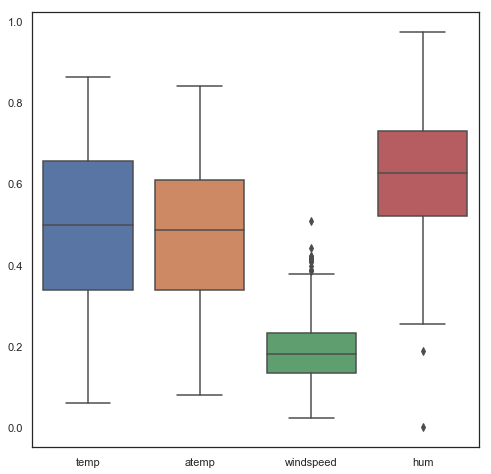

In [120]:
# NO missing value so no nned to of imputation
# Now we will plot boxplots for numerical variables and analyze distributions and outliers
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(data=day[['temp','atemp','windspeed','hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)

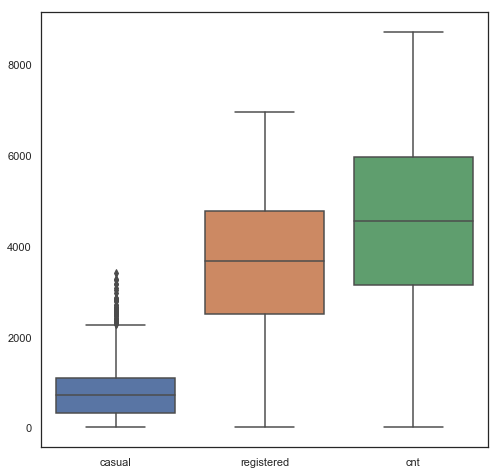

In [121]:
# here outliers are detected in windspeed and humidity variable we wont do anything rightnow
# now we will see boxplot for cnt, registered nd casual users
sns.boxplot(data=day[['casual','registered','cnt']])
fig=plt.gcf()
fig.set_size_inches(8,8)

##### here casual variable have outliers which represents extreme case when more people on some particular day might come out for cycling
like some health awareness day, world pollution day are probable possiblities for casual user outliers


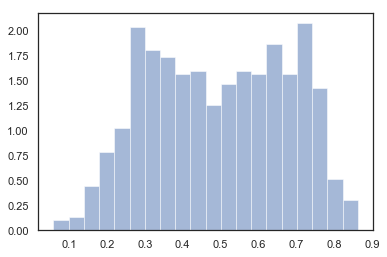

In [122]:
# Now we will see distribution of continous variable because our target variable is continous so it is regression problem
# for regression problem our variables must be normally distributed for better results

plt.hist(data = day,x = 'temp',bins = 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

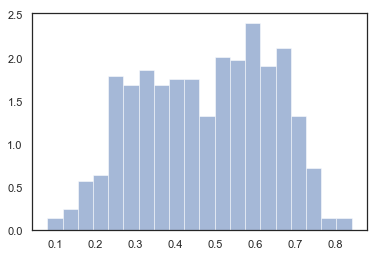

In [123]:
plt.hist(data = day,x = 'atemp', bins = 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

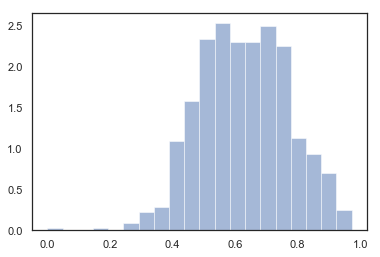

In [124]:
plt.hist(data = day,x = 'hum', bins = 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.show()

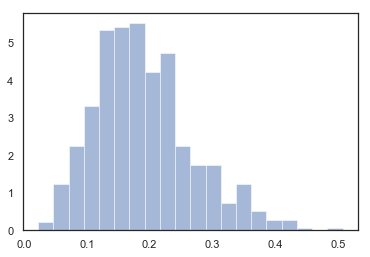

In [125]:
plt.hist(data = day,x = 'windspeed', bins = 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.show()

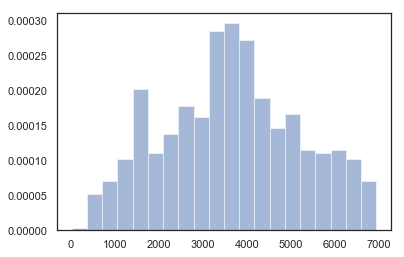

In [126]:
plt.hist(data = day,x = 'registered', bins = 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.show()

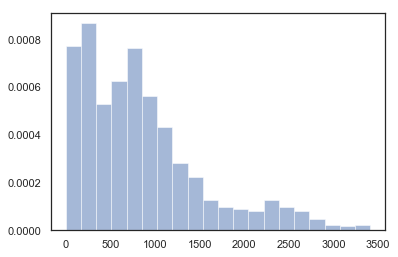

In [127]:
plt.hist(data = day,x = 'casual', bins = 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.show()

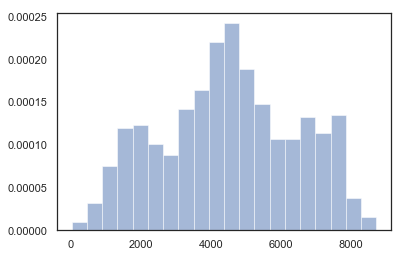

In [128]:
plt.hist(data = day,x = 'cnt', bins = 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)
plt.show()

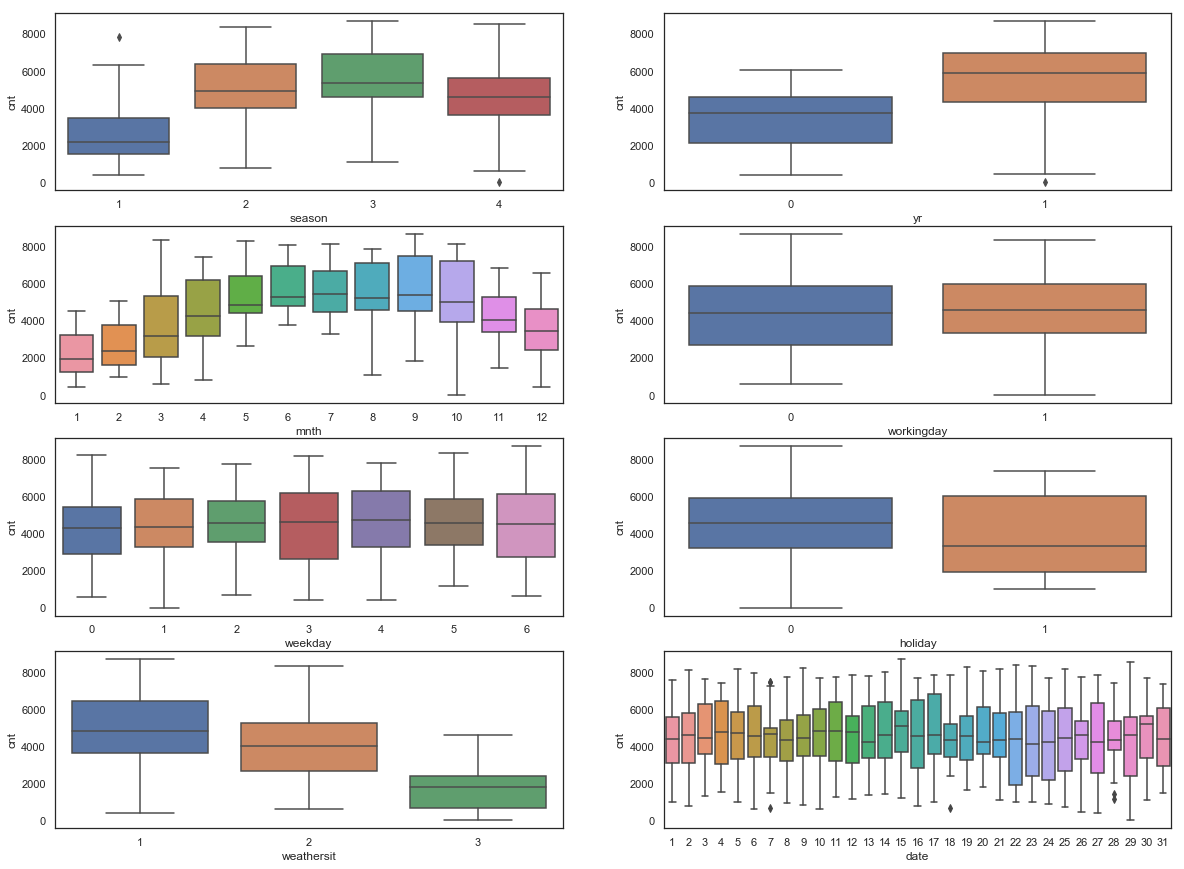

In [129]:
# Some important points to note from here
# 1. Distribution of humidity and windspeed is not exactly normal dostributed
# 2. Registered user count is normally distributed but casual users is left skewed
# 3. Final cnt variable is almost normally distributed

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,15)
sns.boxplot(data=day,y="cnt",x="season",ax=axes[0][0])

sns.boxplot(data=day,y="cnt",x="yr",ax=axes[0][1])

sns.boxplot(data=day,y="cnt",x="mnth",ax=axes[1][0])

sns.boxplot(data=day,y="cnt",x="workingday",ax=axes[1][1])

sns.boxplot(data=day,y="cnt",x="weekday",ax=axes[2][0])

sns.boxplot(data=day,y="cnt",x="holiday",ax=axes[2][1])

sns.boxplot(data=day,y="cnt",x="weathersit",ax=axes[3][0])

sns.boxplot(data=day,y="cnt",x="date",ax=axes[3][1])








 some of the analysis drawn from this plots are
#1. Weather situation 1 has higher count which reflects people like to ride bicycle in clear weathersit
#2. In fall and Summer season more people ride bicycle and it drops in Spring season
#3. from month 5 to month 10 there is high demand it fits well with season analysis
#4. There no such trend observed in day variable it si almost constant
#5. Weekday variable also exhibits a constant count, not much variation
#6. From year 2011 to 2012 the average bicycle count has almost double, company is growing
#we could drop variable day and weekday/workingday from dataset as they are not exhibiting any trend
#will take a call on this later

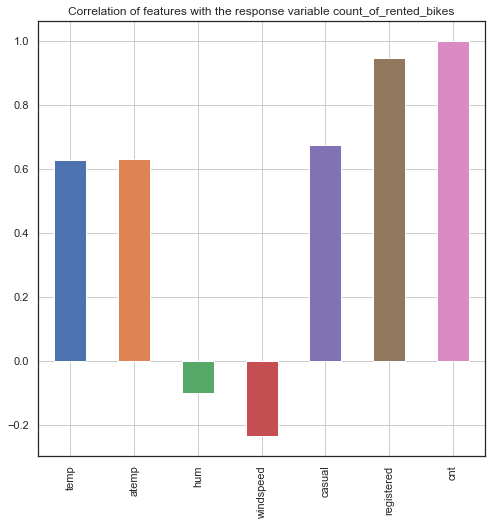

In [130]:
# Correlation analysis for continous variable 
corr=day[['temp','atemp','hum','windspeed','casual','registered', 'cnt']].corrwith(day.cnt)
corr.plot.bar(figsize=(8,8), title='Correlation of features with the response variable count_of_rented_bikes', grid=True, legend=False, style=None, fontsize=None, colormap=None, label=None)

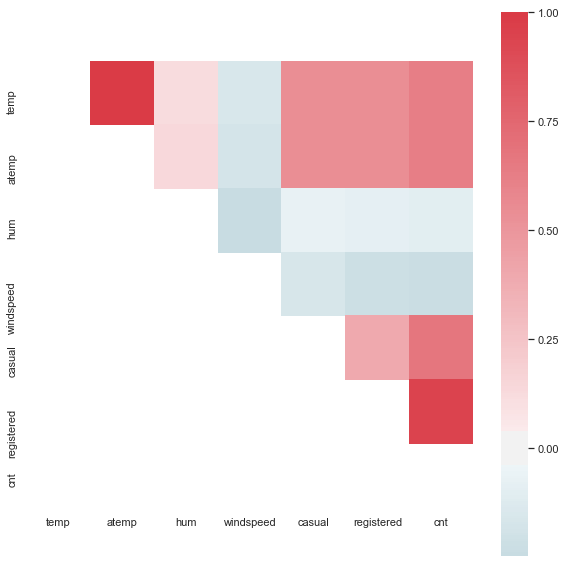

In [131]:
#correlation matrix
sns.set(style='white')
corr = day.drop(columns=['date']).corr()
mask =np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(10,10))
cmap=sns.diverging_palette(220, 10, s=75, l=50, sep=10, n=6, center='light', as_cmap=True)
sns.heatmap(corr, vmin=None, vmax=None, cmap=cmap, center=0, robust=False, fmt='.2g', linewidths=0, linecolor='white', square=True, mask=mask, ax=None)

In [132]:

# From here we can say that temp and atemp are highly correlated
# cnt and registered user are also highly correlated, which is true also becuase with passage of time registered user base will increase and so casual user will represent much less in total count
# windspeed and humidity are not affecting that much as temperature is
# so we will drop temp and date variable; as temp is correlated with atemp AND date variable is not adding any meaning to our dataset
# Also we will drop casual and Registered users because anyways we are interested in predicting final user count on that day
day = day.drop(columns=['date', 'temp', 'casual', 'registered'])


In [133]:
# checking final shape of data before model building
day.shape

(731, 11)

# ############### Model Building ################################

In [134]:
# Here we will use ensemble technique for model building
# most famous algorithm under ensemble technique is Random Forest Regression
# we will import test train split and other libraries
from sklearn.model_selection import train_test_split


In [135]:
# Test and train solit in 70-30 ratio
train,test = train_test_split(day, test_size = 0.3, random_state = 123)


In [143]:
# import libraries and implement model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=1000,random_state=123).fit(train.iloc[:,0:10], train.iloc[:,10])


In [144]:
# Model
rf_predictions = rf_model.predict(test.iloc[:,0:10])


In [145]:
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual) *100)
    return mape

In [146]:
MAPE(test.iloc[:,10],rf_predictions)


15.428127805047511

In [ ]:
# So we have built a model with almost 85% Accuracy